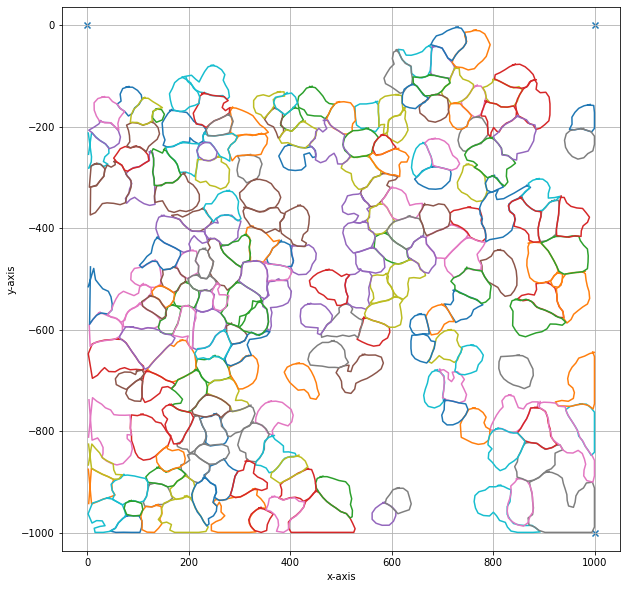

In [5]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im).astype(np.uint32)

all_classes = np.unique(segmentation)

cell_sets = [{"classes": all_classes, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]])
}

sl = SegmentationLoader(config = loader_config)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(fig_size = (10, 10))


No configuration for shape_erosion found, parameter will be set to 0
No configuration for greedy_k found, parameter will be set to 0
No configuration for segmentation_channel found, parameter will be set to 15
No configuration for hilbert_p found, parameter will be set to 7
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for processes found, parameter will be set to 10
sanity check for cell set 0
cell set 0 passed sanity check
Convert label format into coordinate format
Conversion finished, sanity check
Check failed, returned lengths do not match cell set.
 Some classes were not found in the segmentation and were therefore removed.
 Please make sure all classes specified are present in your segmentation.
1 classes were not found and therefore removed.
Check passed
Check passed
Initializing shapes for polygon creation
Initializing shape 0
Create shapes for merged c

100%|██████████| 208/208 [00:02<00:00, 82.23it/s]

Calculating polygons



100%|██████████| 208/208 [00:05<00:00, 39.64it/s]


Polygon calculation finished
Current path length: 98,744.20 units
Path optimizer defined in config: hilbert
Optimized path length: 14,490.71 units
Optimization factor: 6.8x


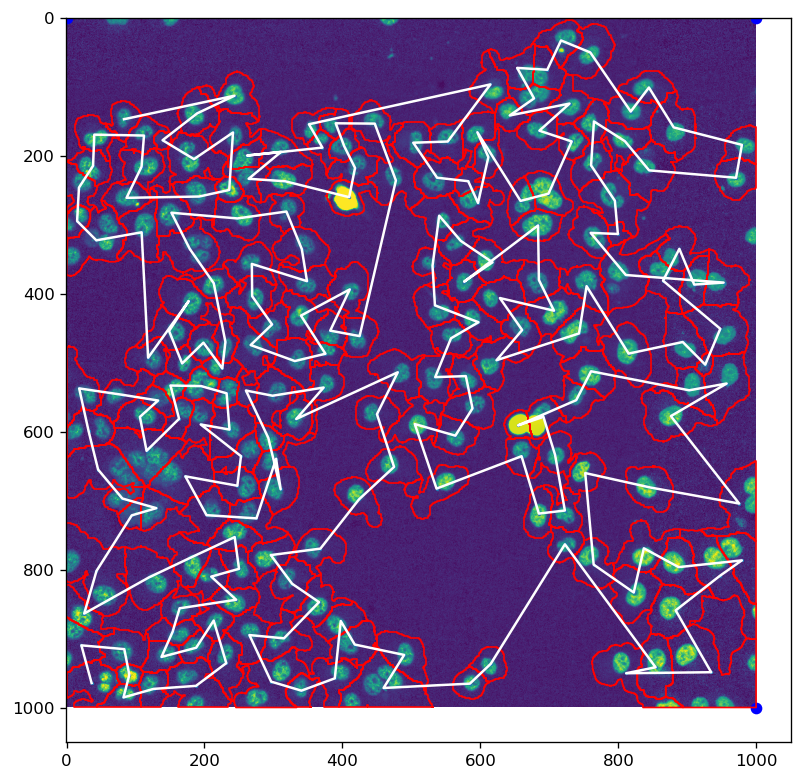

===== Collection Stats =====
Number of shapes: 208
Number of vertices: 126,812
Mean vertices: 610
Min vertices: 220
5% percentile vertices: 380
Median vertices: 594
95% percentile vertices: 893
Max vertices: 1,300


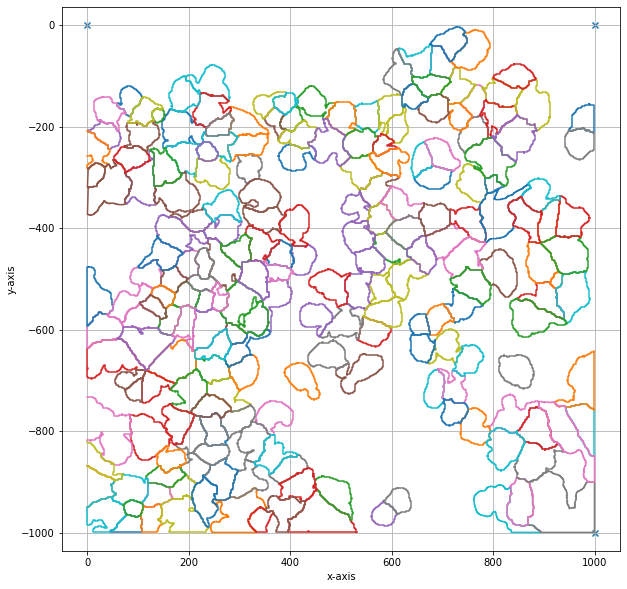

In [6]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = all_classes #np.array_split(all_classes[indices],2)

cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = True)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = True, fig_size = (10, 10))




In [4]:
off = np.array([10, -8])
np.max(np.array([off, [0,0]]), axis=0) 

array([10,  0])